## Clustering
+ Finding subgroups/clusters within data that are similar.
+ To define two or more observations to be similar or different, often a domain-specific consideration must be made based on knowledge of the data being studied.
+ Clustering and PCA seek to simplify the data via a small number of summaries.
+ But, PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance;
+ While clustering looks to find homogeneous subgroups among the observations.
+ Applications:
    + **market segmentation** - identify subgroups of people who might be more receptive to a particular form of advertising, or more likely to purchase a particular product.
+ Can cluster observations based on the features, or cluster features based on the observations to discover subgroups among the features.
+ The latter can be performed by simply transposing data matrix.

### K-Means
+ Clustering where you define the number of clusters, K, ahead of time.
+ Let $C_1, \ldots, C_K$ denote sets containing indices of the observations, where:
    + $C_1 \cup C_2 \cup \ldots \cup C_K = \left\{ 1, \ldots, n \right\}$.
    + $C_k \cap C_{k^\prime} = \emptyset$ for all $k \neq k^\prime$
    + $i \in C_k$ means that $i^\textrm{th}$ observation is in the $k^\textrm{th}$ cluster.
+ Good clustering is one for which the within-cluster variation, $W(C_k)$, is as small as possible,
$$\min_{C_1, \ldots, C_K}\left\{ \sum_{k=1}^K{W(C_k)} \right\}$$
Which means we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible.
+ There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance.
$$W(C_k) = \frac{1}{|C_k|}\sum_{i,i^\prime \in C_k}\sum_{j=1}^p{(x_{ij} - x_{i^\prime j})^2}$$
where $|C_k|$ is the number of observations in the $k^\textrm{th}$ cluster.
+ One way to solve this is by this approach:
    + Randomly assign each point to a cluster
    + Iterate until cluster assignments stop changing:
        + For each cluster, compute the cluster centroid (vector of the p feature means for the observations in that cluster).
        + All points are then reassigned based on whose centroid is closest (using euclidean distance).
        + A new centroid is found by averaging the points in each cluster.
        + Process stops after centroids stop moving or some max number of iterations.
    + It is important to run the algorithm multiple times from different random initial configurations. Selects the best solution
+ Can do initial assignment multiple times and choose clustering assignment with least total variance.



## 聚类
+ 在数据中寻找相似的子组/聚类。
+ 要将两个或多个观察结果定义为相似或不同，通常必须根据对所研究数据的了解进行特定领域的考虑。
+ 聚类和 PCA 试图通过少量摘要来简化数据。
+ 但是，PCA 试图找到观察结果的低维表示，以解释大部分方差；
+ 而聚类则试图在观察结果中找到同质子组。
+ 应用：
+ **市场细分** - 识别可能更容易接受特定形式的广告或更有可能购买特定产品的人群子组。
+ 可以根据特征对观察结果进行聚类，或根据观察结果对特征进行聚类以发现特征中的子组。
+ 后者可以通过简单地转置数据矩阵来执行。

### K-Means
+ 聚类，其中您提前定义聚类数 K。
+ 令 $C_1, \ldots, C_K$ 表示包含观测值索引的集合，其中：
+ $C_1 \cup C_2 \cup \ldots \cup C_K = \left\{ 1, \ldots, n \right\}$。
+ 对于所有 $k \neq k^\prime$，$C_k \cap C_{k^\prime} = \emptyset$
+ $i \in C_k$ 表示第 $i^\textrm{th}$ 个观测值位于第 $k^\textrm{th}$ 个簇中。
+ 良好的聚类是簇内变异 $W(C_k)$ 尽可能小的聚类，
$$\min_{C_1, \ldots, C_K}\left\{ \sum_{k=1}^K{W(C_k)} \right\}$$
这意味着我们希望将观测值划分为 K 个簇，使得所有 K 个簇的总簇内变异（总和）尽可能小。
+ 有很多种方法可以定义这个概念，但迄今为止最常见的选择是平方欧几里得距离。
$$W(C_k) = \frac{1}{|C_k|}\sum_{i,i^\prime \in C_k}\sum_{j=1}^p{(x_{ij} - x_{i^\prime j})^2}$$
其中 $|C_k|$ 是第 $k^\textrm{th}$ 个簇中的观测值数量。
+ 解决此问题的一种方法是采用以下方法：
+ 将每个点随机分配给一个簇
+ 迭代直到簇分配停止变化：
+ 对于每个簇，计算簇质心（该簇中观测值的 p 个特征均值的向量）。
+ 然后根据谁的质心最接近（使用欧几里得距离）重新分配所有点。
+ 通过平均每个簇中的点来找到新的质心。
+ 在质心停止移动或最大迭代次数后，过程停止。
+ 从不同的随机初始配置多次运行算法非常重要。选择最佳解决方案
+ 可以多次进行初始分配，并选择总方差最小的聚类分配。

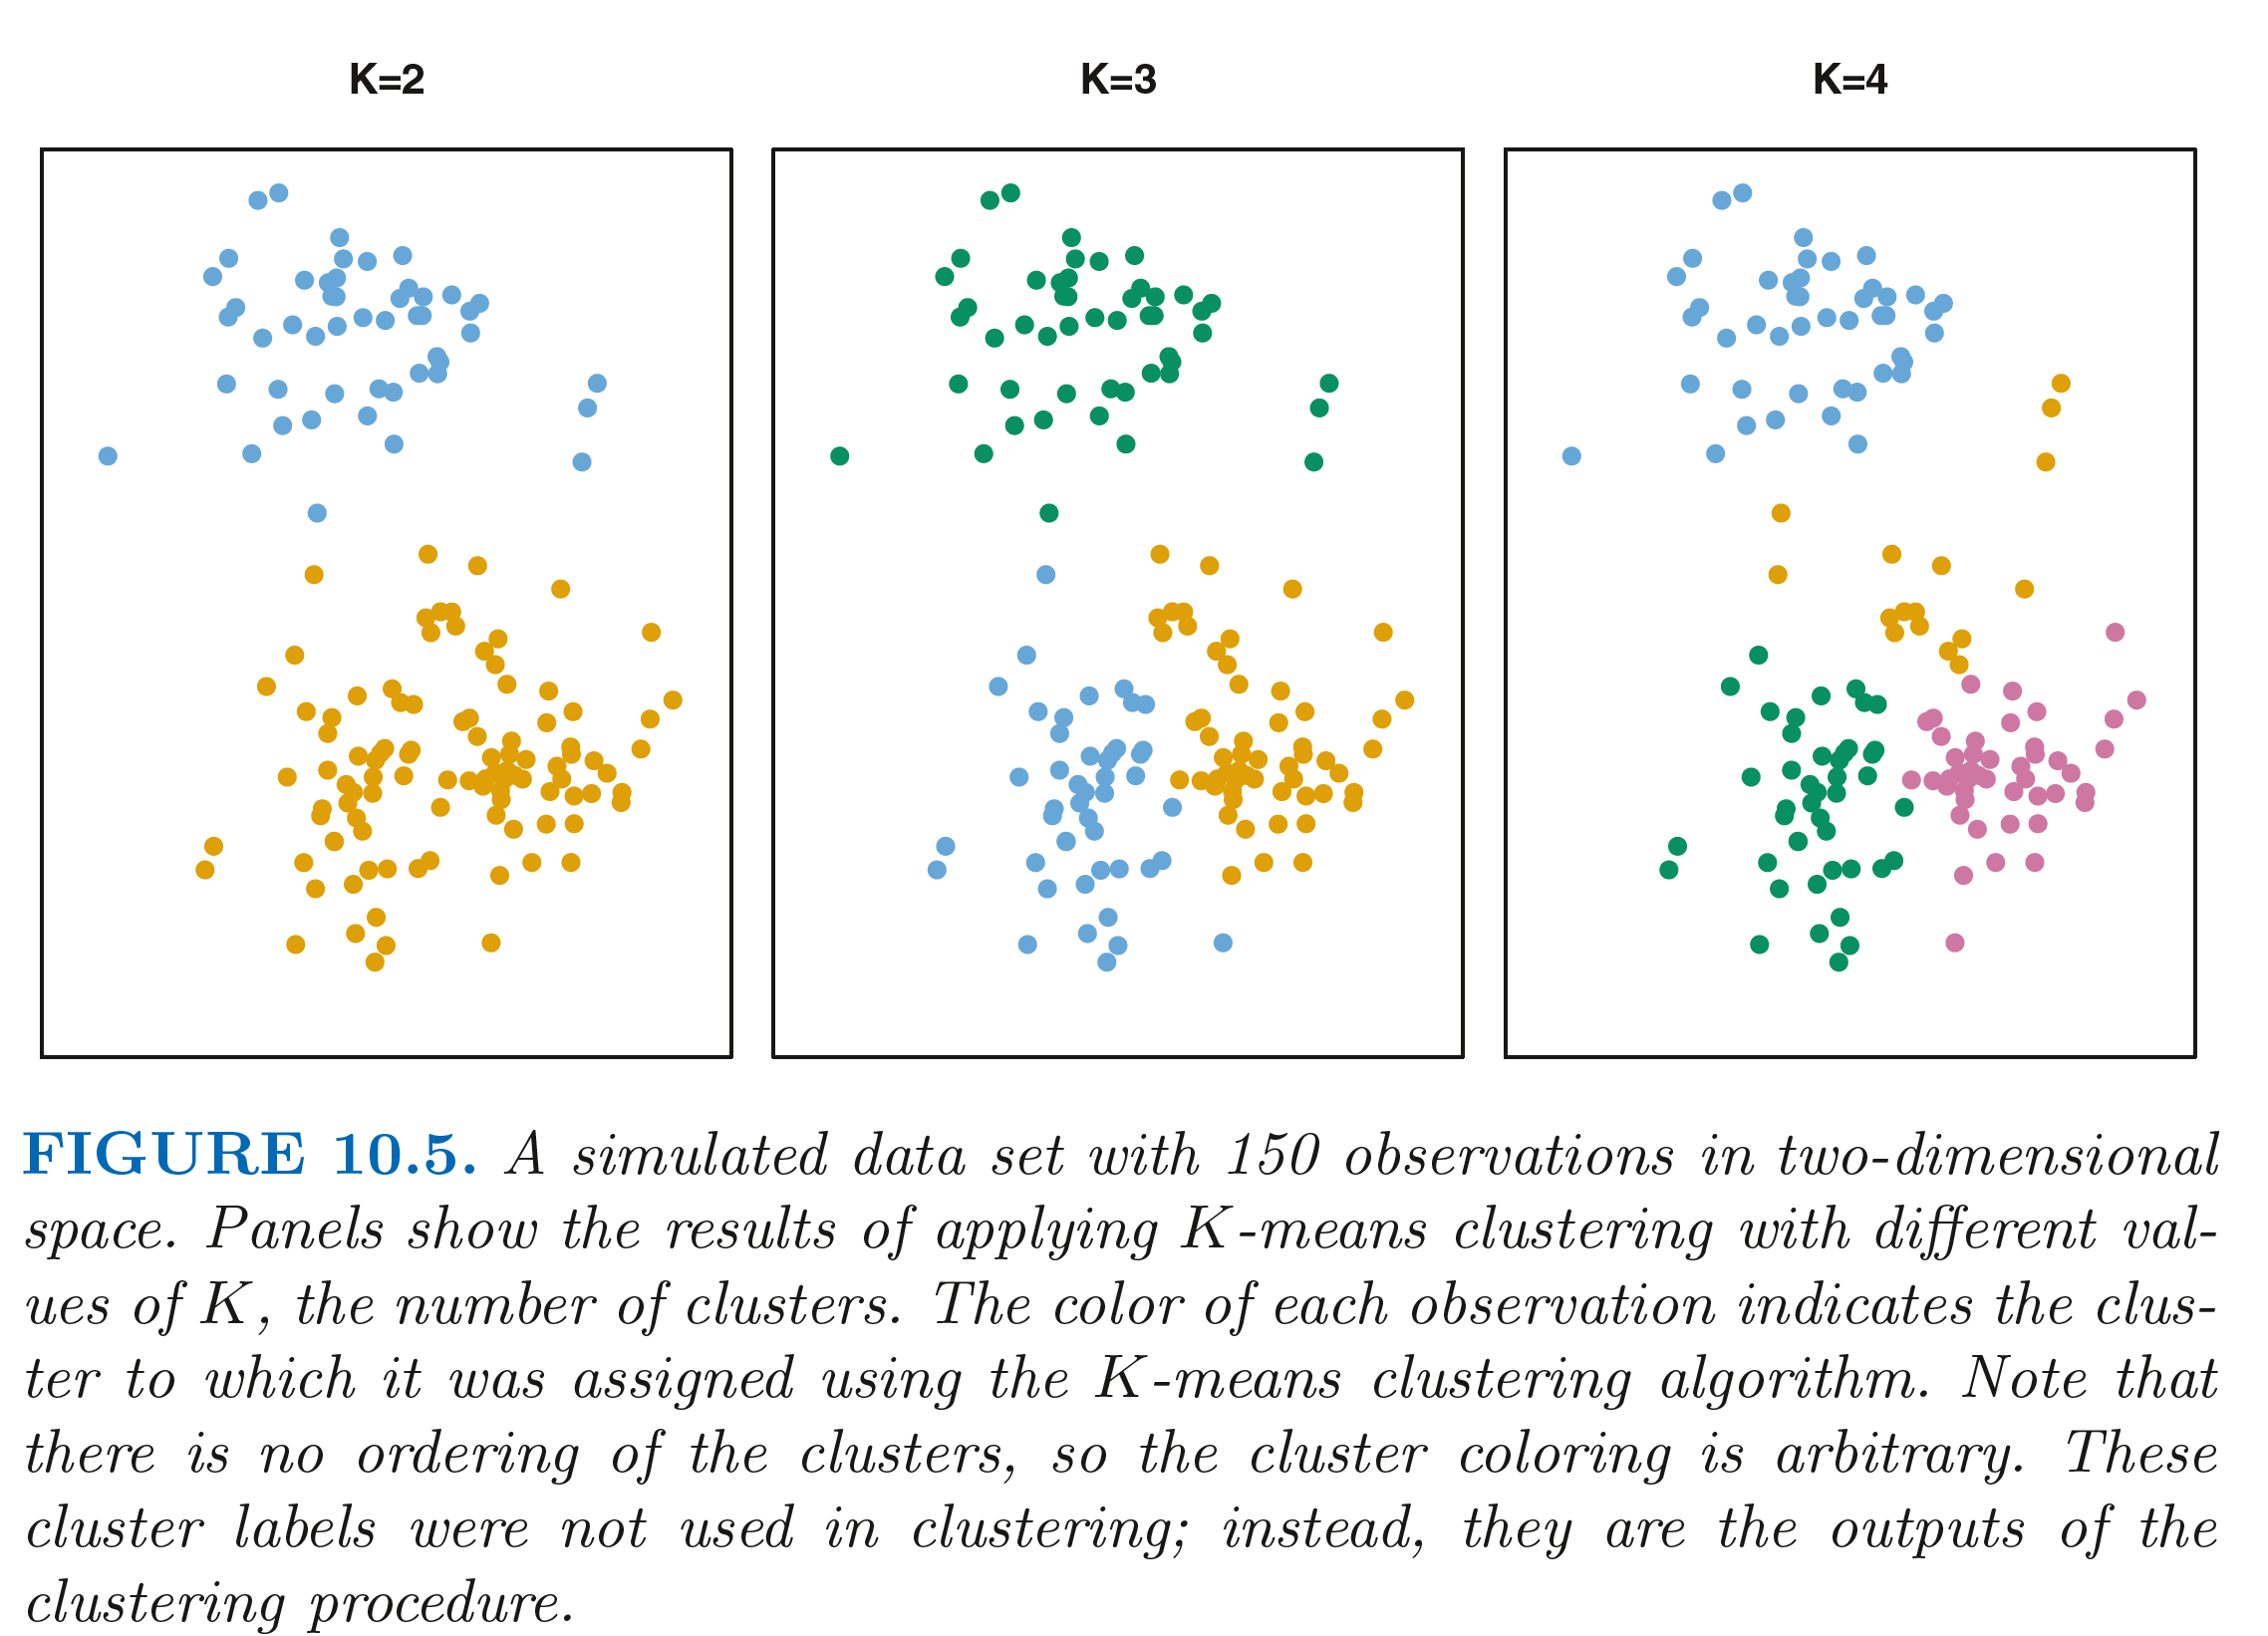

In [ ]:
from IPython.display import Image
Image('pw101.PNG', width =700)

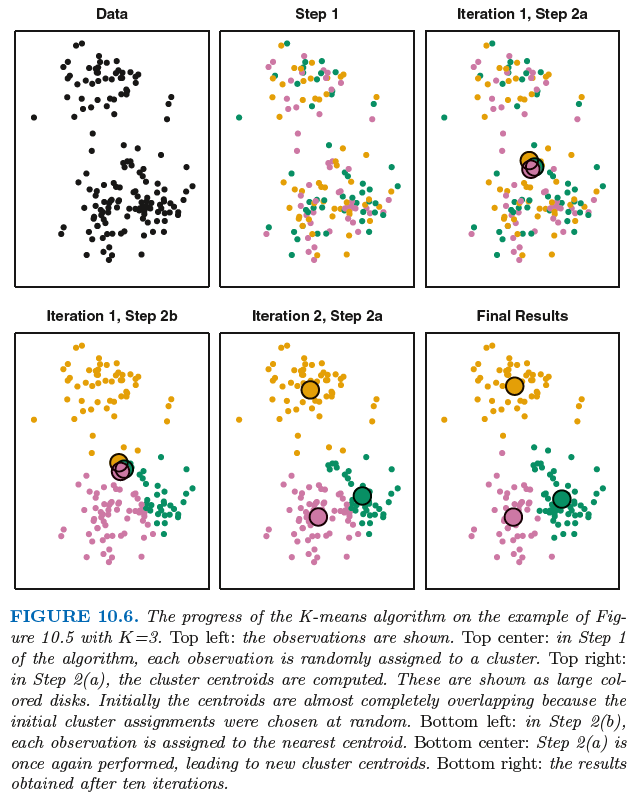

In [ ]:
Image('pw102.PNG', width =700)

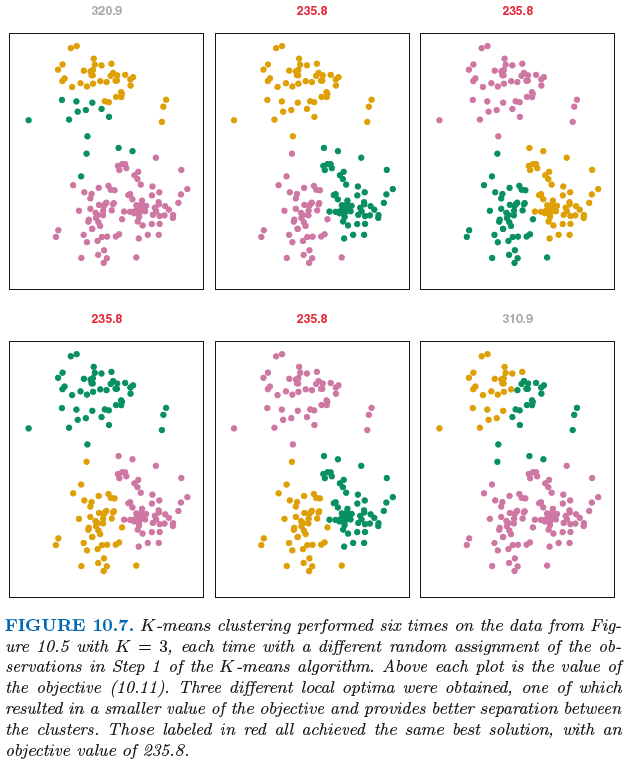

In [ ]:
Image('pw103.PNG', width =700)

### Lab 1
+ The `sklearn` function `Kmeans()` performs K-means clustering in Python.
+ We begin with a simple simulated example in which there truly are two clusters in the data: the first 25 observations have a mean shift relative to the next 25 observations.

+ `sklearn` 函数 `Kmeans()` 在 Python 中执行 K 均值聚类。
+ 我们从一个简单的模拟示例开始，其中数据中确实有两个聚类：前 25 个观测值相对于接下来的 25 个观测值有一个均值偏移。

Text(0, 0.5, 'X1')

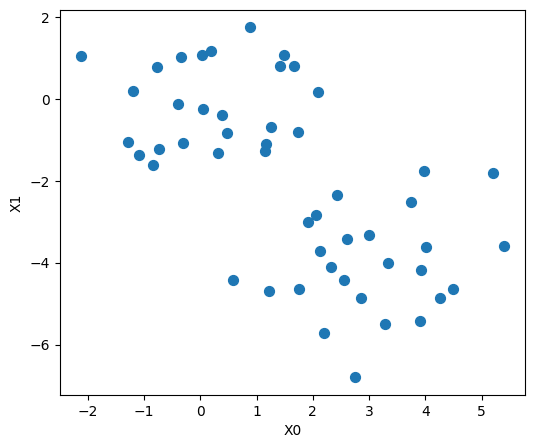

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50)
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [ ]:
## perform K-means clustering with K = 2:
# 执行 K = 2 的 K 均值聚类：
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## The cluster assignments of the 50 observations are contained in kmeans.labels_:
# 50 个观测的聚类分配包含在 kmeans.labels_ 中：
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X

array([[ 1.9143694 , -3.00265455],
       [ 3.2829785 , -5.50629471],
       [ 2.42139975, -2.34856346],
       [ 0.57332076, -4.42891263],
       [ 4.26593626, -4.8667404 ],
       [ 2.32111385, -4.09470897],
       [ 4.49138963, -4.638902  ],
       [ 2.55601804, -4.43435128],
       [ 5.20593008, -1.81321391],
       [ 4.0040539 , -3.6138136 ],
       [ 3.73736858, -2.50926797],
       [ 2.06416613, -2.82417096],
       [ 1.74611933, -4.6377515 ],
       [ 3.9071052 , -5.4286807 ],
       [ 2.85993128, -4.8617549 ],
       [ 2.74438063, -6.79858911],
       [ 1.2284669 , -4.69987723],
       [ 3.92746243, -4.17363568],
       [ 3.00284592, -3.31177729],
       [ 2.12046366, -3.71637268],
       [ 2.19463348, -5.72766949],
       [ 2.60910021, -3.42619414],
       [ 3.33858905, -4.01183049],
       [ 5.39236527, -3.58708784],
       [ 3.97873601, -1.76185666],
       [-1.29408532, -1.03878821],
       [ 1.74371223, -0.79806274],
       [ 0.02968323,  1.06931597],
       [ 0.89070639,

+ The K-means clustering perfectly separated the observations into two clusters even though we did not supply any group information to `Kmeans()`.
+ We can plot the data, with each observation colored according to its cluster assignment:

+ 即使我们没有向 `Kmeans()` 提供任何组信息，K 均值聚类也能完美地将观测值分成两个聚类。
+ 我们可以绘制数据，每个观测值根据其聚类分配进行着色：

Text(0, 0.5, 'X1')

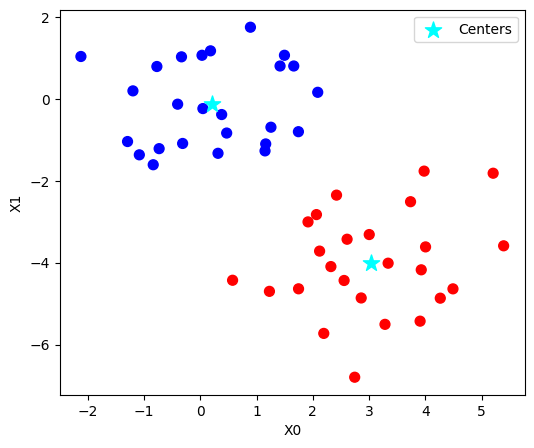

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans.labels_, cmap = plt.cm.bwr)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 150,
            color = 'cyan',
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

+ Here the observations can be easily plotted because they are two-dimensional.
+ If there were more than two variables then we could instead perform PCA and plot the first two principal components score vectors.

+ In this example, we knew that there really were two clusters because we generated the data.
+ However, for real data, in general we do not know the true number of clusters.
+ We could instead have performed K-means clustering on this example with `K  =  3`.
+ If we do this, K-means clustering will split up the two "real" clusters, since it has no information about them:


+ 由于观测值是二维的，因此可以很容易地绘制这些观测值。
+ 如果有两个以上的变量，那么我们可以改为执行 PCA 并绘制前两个主成分得分向量。

+ 在这个例子中，我们知道确实有两个聚类，因为我们生成了数据。
+ 但是，对于真实数据，我们通常不知道真实的聚类数量。
+ 我们可以改为对这个例子执行 K 均值聚类，其中 `K = 3`。
+ 如果我们这样做，K 均值聚类将拆分两个“真实”聚类，因为它没有关于它们的信息：

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'X1')

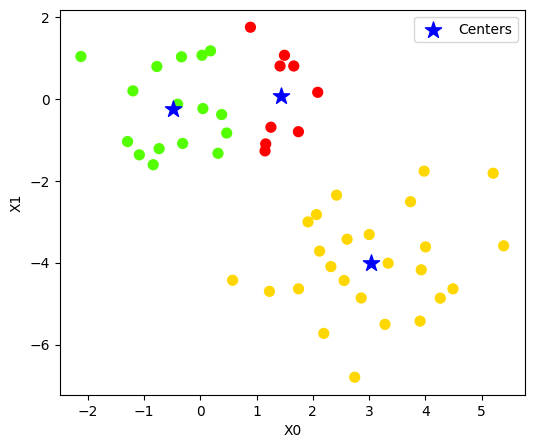

In [ ]:
kmeans_3_clusters = KMeans(n_clusters = 3, random_state = 123)
kmeans_3_clusters.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clusters.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans_3_clusters.cluster_centers_[:, 0], kmeans_3_clusters.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

+ To run the `Kmeans()` function in python with multiple initial cluster assignments, we use the `n_init` argument (default: 10).
+ If a value of `n_init` greater than one is used, then K-means clustering will be performed using multiple random assignments, and the `Kmeans()` function will report only the best results.
+ Here we compare using `n_init = 1`:

+ 要在具有多个初始聚类分配的 Python 中运行 `Kmeans()` 函数，我们使用 `n_init` 参数（默认值：10）。
+ 如果使用的 `n_init` 值大于一，则将使用多个随机分配执行 K 均值聚类，并且 `Kmeans()` 函数将仅报告最佳结果。
+ 在这里我们使用 `n_init = 1` 进行比较：

In [ ]:
km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

104.52330756352504

In [ ]:
## `n_init = 20`:
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

98.83395271281779

+ Note that `.inertia_` is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.

+ It is generally recommended to always run K-means clustering with a large value of `n_init`, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

+ When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the `random_state` parameter.
+ This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.


+ 请注意，“.inertia_”是簇内平方和的总和，我们通过执行 K 均值聚类来最小化该值。

+ 通常建议始终使用较大的“n_init”值（例如 20 或 50）运行 K 均值聚类，以避免陷入不良的局部最优。

+ 执行 K 均值聚类时，除了使用多个初始簇分配外，使用“random_state”参数设置随机种子也很重要。
+ 这样，初始簇分配就可以复制，并且 K 均值输出将完全可重现。

#### Advantages of K-Means
+ Relatively scalable and efficient in processing large data sets
+ The computational complexity of the algorithm is $O(nkt)$
    + $n$ : total number of objects
    + $k$ : number of clusters
    + $t$ : number of iterations
    + Normally, $k<<n$ and $t<<n$

#### Disadvantages of K-Means
+ Can be applied only when the mean of a cluster is defined
+ Users need to specify $k$
+ K-means is not suitable for discovering clusters with nonconvex shapes or clusters of very different size
+ It is sensitive to noise and outlier data points (can influence the mean value)

#### Notes:
+ There were variants of k-means which differ in:
    + Selection of the initial k means
    + Dissimilarity calculations
    + Strategies to calculate cluster means



#### K-Means 的优点
+ 在处理大型数据集时具有相对可扩展性和效率
+ 该算法的计算复杂度为 $O(nkt)$
+ $n$ ：对象总数
+ $k$ ：簇数
+ $t$ ：迭代次数
+ 通常，$k<<n$ 和 $t<<n$

#### K-Means 的缺点
+ 仅在定义了簇的平均值时才适用
+ 用户需要指定 $k$
+ K-means 不适用于发现具有非凸形状或大小差异很大的簇
+ 它对噪声和异常数据点很敏感（会影响平均值）

#### 注释：
+ 存在 k-means 的变体，其不同之处在于：
+ 初始 k 均值的选择
+ 相异度计算
+ 计算簇均值的策略

### K-modes
+ To handle categorical data
+ Using modes instead of means
+ There were various dissimilarity measures to deal with categorical objects
+ Using a frequency based method to update modes of clusters
+ The entire algorithm for K-modes is built upon using the highest frequency to form the clusters.
+ Mixture of categorical and numerical data.


#### Algorithm
1. Randomly assign $K$ number of modes. (select initial $k$ number of random data points as modes).
2. Calculate the dissimilarity score between each of the remaining data points from the $K$ number of chosen modes.
3. Associate the data points to the mode whose score is minimum. (you will have $K$ number of clusters)
4. Use ‘Moving mode frequency based method’ to update the modes (for each of the $k$ clusters we need to update the modes).
5. Repeat from step 2 until there is no reassignment of clusters or when cost function is minimized.

#### Dissimilarity score
Let $X$ and $Y$ are two categorical objects having $n$ attributes:
$X = [X_1, X_2, \cdots, X_n]$, $Y = [Y_1, Y_2, \cdots, Y_n]$
The dissimilarity score is given as

$$\textrm{Diss}(X,Y) = \sum_{j=1}^n{\delta(X_j,Y_j)}$$

where

$$\delta(X_j,Y_j) = \begin{cases} 0 \textrm{ if } X_j=Y_j \\
1 \textrm{ if } X_j\neq Y_j \end{cases}$$

#### Moving mode frequency based method
Let $A = \left[ \begin{matrix} 1 \\ 1 \\ 0 \end{matrix} \right], B = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right], C = \left[ \begin{matrix} 0 \\ 0 \\ 1 \end{matrix} \right]$ be three categorical objects having three attributes in binary format.

Then the new updated mode will be $\textrm{Mode} = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right]$

#### Cost function
Let there be $C_i (i=1,\ldots,K)$ number of clusters formed after using k-modes algorithm, then the cost function is given by

$$J=\sum_{i=1}^k{\sum_{X_j \in C_i}{\textrm{Diss}(X_j,Q_i)}}$$

where $X_j$ is categorical object of $i^\textrm{th}$ cluster and $Q_i$ is the mode of the $i^\textrm{th}$ cluster.

### K-模式
+ 处理分类数据
+ 使用模式而不是均值
+ 有各种不同的测量方法来处理分类对象
+ 使用基于频率的方法更新聚类的模式
+ K-模式的整个算法建立在使用最高频率形成聚类的基础上。
+ 分类数据和数值数据的混合。

#### 算法
1. 随机分配 $K$ 个模式。（选择初始 $k$ 个随机数据点作为模式）。
2. 从 $K$ 个选定模式中计算剩余数据点之间的差异分数。
3. 将数据点与分数最小的模式相关联。（您将拥有 $K$ 个聚类）
4. 使用“基于移动模式频率的方法”来更新模式（对于每个 $k$ 个聚类，我们需要更新模式）。
5. 从步骤 2 重复，直到不再重新分配聚类或成本函数最小化。

#### 差异分数
假设 $X$ 和 $Y$ 是具有 $n$ 个属性的两个分类对象：
$X = [X_1, X_2, \cdots, X_n]$，$Y = [Y_1, Y_2, \cdots, Y_n]$
差异分数定义为

$$\textrm{Diss}(X,Y) = \sum_{j=1}^n{\delta(X_j,Y_j)}$$

其中

$$\delta(X_j,Y_j) = \begin{cases} 0 \textrm{ if } X_j=Y_j \\
1 \textrm{ if } X_j\neq Y_j \end{cases}$$

#### 基于移动模式频率的方法
假设 $A = \left[ \begin{matrix} 1 \\ 1 \\ 0 \end{matrix} \right], B = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right], C = \left[ \begin{matrix} 0 \\ 0 \\ 1 \end{matrix} \right]$ 是三个具有三个属性的二进制格式的分类对象。

那么新的更新模式将是 $\textrm{Mode} = \left[ \begin{matrix} 0 \\ 1 \\ 1 \end{matrix} \right]$

#### 成本函数
假设使用 k-modes 算法后形成的簇数为 $C_i (i=1,\ldots,K)$，则成本函数为

$$J=\sum_{i=1}^k{\sum_{X_j \in C_i}{\textrm{Diss}(X_j,Q_i)}}$$

其中 $X_j$ 是第 $i^\textrm{$ 个簇的分类对象，$Q_i$ 是第 $i^\textrm{$ 个簇的模式。

### Lab 2

In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data 随机分类数据
data = np.random.choice(20, (100, 10))

data

array([[ 1,  3, 17, 14,  5,  1, 18,  5,  2, 18],
       [14, 13,  3, 18, 14,  9, 17,  3, 11, 11],
       [10,  3, 13, 14,  3,  3, 14, 16,  4,  4],
       [ 5, 16,  9,  2,  5,  1,  5,  9, 15,  2],
       [10,  4,  3, 16,  3,  2,  5, 17, 17,  2],
       [13, 10,  8,  0,  3,  3, 19,  1,  7,  6],
       [ 3,  1,  7, 18,  6,  5,  9,  8,  9,  4],
       [ 8, 18,  4, 12,  3, 19, 17,  7, 12,  8],
       [14, 14, 16, 16, 14, 15, 17, 16, 14, 14],
       [11, 15,  4,  0,  7,  1,  2, 10, 18,  7],
       [ 7,  3,  6,  1,  8, 17, 13, 10, 15,  0],
       [ 3, 17, 19,  7,  7, 19, 14, 19,  5,  1],
       [ 5,  9, 17,  3, 13,  1,  6, 17, 16, 16],
       [12, 19, 16,  6,  2,  7, 10,  5, 14, 17],
       [ 0,  0,  2,  6,  5, 15, 14,  9, 17,  5],
       [19,  6,  4,  7, 13, 17, 14,  6,  0, 19],
       [ 1,  3,  0,  8, 13,  5, 17, 19,  2,  2],
       [13,  0, 14,  2, 14, 14,  0, 18,  0,  3],
       [ 9, 15, 16, 10, 14, 15,  6,  0,  7, 13],
       [ 1, 16,  1,  7,  5, 19, 16,  4, 19,  5],
       [17, 14,  0, 

In [ ]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 808.0
Run 1, iteration: 2/100, moves: 6, cost: 807.0
Run 1, iteration: 3/100, moves: 0, cost: 807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 807.0
Run 2, iteration: 2/100, moves: 2, cost: 807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 19, cost: 792.0
Run 3, iteration: 2/100, moves: 3, cost: 792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12, cost: 802.0
Run 4, iteration: 2/100, moves: 9, cost: 798.0
Run 4, iteration: 3/100, moves: 6, cost: 795.0
Run 4, iteration: 4/100, moves: 0, cost: 795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13, cost: 807.0
Run 5, iteration: 2/100, moves:

In [ ]:
# Print the cluster centroids 打印聚类质心
print(km.cluster_centroids_)

[[ 1 16 17  7  9  1  2 12  1  5]
 [13 10  5 11  3 17 14  4 16  3]
 [14  2 16  2  2 14  0  7  0  8]
 [14 14 16 16 14  5 13 16 14 13]]


In [ ]:
km.labels_

array([0, 3, 1, 0, 1, 1, 3, 2, 3, 0, 1, 0, 0, 2, 0, 1, 0, 2, 3, 0, 1, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 3, 2, 3, 1, 3, 1, 2, 3, 1, 0, 1, 3,
       3, 0, 2, 2, 1, 3, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 2, 3, 2, 1, 2, 0, 1, 3], dtype=uint16)

### Lab 3

download soybean dataset: https://github.com/nicodv/kmodes/tree/master/examples

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

# reproduce results on small soybean data set 在小型大豆数据集上重现结果
x = np.genfromtxt('soybean.csv', dtype=int, delimiter=',')[:, :-1]
y = np.genfromtxt('soybean.csv', dtype=str, delimiter=',', usecols=(35, ))

kmodes_huang = KModes(n_clusters=4, init='Huang', verbose=1)
kmodes_huang.fit(x)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 237.0
Run 1, iteration: 2/100, moves: 9, cost: 202.0
Run 1, iteration: 3/100, moves: 2, cost: 201.0
Run 1, iteration: 4/100, moves: 0, cost: 201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 260.0
Run 3, iteration: 2/100, moves: 6, cost: 254.0
Run 3, iteration: 3/100, moves: 4, cost: 254.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 18, cost: 265.0
Run 5, iteration: 2/100, moves: 3, cost: 260.0
Run 5, iteration: 3/100, moves: 0, cost: 260.0
Init: initializing centroids
Init:

KModes(init='Huang', n_clusters=4, verbose=1)

In [ ]:
# Print cluster centroids of the trained model. 打印训练模型的聚类质心。
print('k-modes (Huang) centroids:')
print(kmodes_huang.cluster_centroids_)
# Print training statistics 打印训练统计数据
print('Final training cost: {}'.format(kmodes_huang.cost_))
print('Training iterations: {}'.format(kmodes_huang.n_iter_))

k-modes (Huang) centroids:
[[0 1 2 1 0 3 1 2 1 0 1 1 0 2 2 0 0 0 1 0 2 2 0 0 0 0 0 3 4 0 0 0 0 0 1]
 [5 0 0 2 1 1 2 1 0 0 1 1 0 2 2 0 0 0 1 0 0 3 0 0 0 2 1 0 4 0 0 0 0 0 0]
 [3 0 2 1 0 1 0 1 1 2 1 1 0 2 2 0 0 0 1 0 3 1 1 1 0 0 0 0 4 0 0 0 0 0 0]
 [0 1 2 0 0 0 1 1 0 1 1 0 0 2 2 0 0 0 1 0 1 1 0 1 0 0 0 3 4 0 0 0 0 0 0]]
Final training cost: 199.0
Training iterations: 3


In [ ]:
kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
kmodes_cao.fit(x)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 204.0
Run 1, iteration: 2/100, moves: 2, cost: 199.0
Run 1, iteration: 3/100, moves: 0, cost: 199.0


KModes(n_clusters=4, n_init=1, verbose=1)

In [ ]:
# Print cluster centroids of the trained model. 打印训练模型的聚类质心。
print('k-modes (Cao) centroids:')
print(kmodes_cao.cluster_centroids_)
# Print training statistics 打印训练统计数据
print('Final training cost: {}'.format(kmodes_cao.cost_))
print('Training iterations: {}'.format(kmodes_cao.n_iter_))


k-modes (Cao) centroids:
[[0 1 2 1 0 3 1 2 1 0 1 1 0 2 2 0 0 0 1 0 2 2 0 0 0 0 0 3 4 0 0 0 0 0 1]
 [5 0 0 2 1 1 2 1 0 0 1 1 0 2 2 0 0 0 1 0 0 3 0 0 0 2 1 0 4 0 0 0 0 0 0]
 [3 0 2 1 0 1 0 1 0 2 1 1 0 2 2 0 0 0 1 0 3 1 1 1 0 0 0 0 4 0 0 0 0 0 0]
 [0 1 2 0 0 3 1 1 0 1 1 0 0 2 2 0 0 0 1 0 1 1 0 1 1 0 0 3 4 0 0 0 0 0 0]]
Final training cost: 199.0
Training iterations: 3


In [ ]:
print('Results tables:')
for result in (kmodes_huang, kmodes_cao):
    classtable = np.zeros((4, 4), dtype=int)
    for ii, _ in enumerate(y):
        classtable[int(y[ii][-1]) - 1, result.labels_[ii]] += 1

    print("\n")
    print("    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |")
    print("----|-------|-------|-------|-------|")
    for ii in range(4):
        prargs = tuple([ii + 1] + list(classtable[ii, :]))
        print(" D{0} |    {1:>2} |    {2:>2} |    {3:>2} |    {4:>2} |".format(*prargs))



Results tables:


    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |
----|-------|-------|-------|-------|
 D1 |     0 |     0 |    10 |     0 |
 D2 |     0 |    10 |     0 |     0 |
 D3 |     0 |     0 |     0 |    10 |
 D4 |    17 |     0 |     0 |     0 |


    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |
----|-------|-------|-------|-------|
 D1 |     0 |     0 |    10 |     0 |
 D2 |     0 |    10 |     0 |     0 |
 D3 |     0 |     0 |     0 |    10 |
 D4 |    17 |     0 |     0 |     0 |


## K-Medoids
+ Minimize sensitivity of k-means to outliers
+ Pick actual objects to represent clusters instead of mean values
+ Each remaining object is clustered with the representative object (called medoids) to which is the most similar
+ The algorithm minimizes the sum of the dissimilarities between each object and its corresponding reference point, where the absolute-error criterion is defined as
$$ E = \sum_{j=1}^k{\sum_{p \in C_j}\left|p-o_j\right|}$$
where $p$ is the point in space representing a given object in cluster $C_j$ and $o_j$ is the representative object of $C_j$.
+ The algorithm iterates until, eventually, each representative object is actually the medoid, or most centrally located object, of its cluster. This is the basis of the k-medoids method for grouping $n$ objects into $k$ clusters.

### Partitioning Around Medoids (PAM)
1. After an initial random selection of $k$ representative objects, the algorithm repeatedly tries to make a better choice of cluster representatives.
2. Randomly select a non-representative object
3. All of the possible pairs of objects are analyzed, where one object in each pair is considered a representative object and the other is not.
4. The quality of the resulting clustering is calculated for each such combination.
5. An object, $o_j$, is replaced with the object causing the greatest reduction in error.
6. The set of best objects for each cluster in one iteration forms the representative objects for the next iteration.
7. The final set of representative objects are the respective medoids of the clusters.


## K-Medoids
+ 最小化 k-means 对异常值的敏感度
+ 选择实际对象来表示聚类而不是平均值
+ 每个剩余对象都与最相似的代表性对象（称为 medoids）聚类
+ 该算法最小化每个对象与其对应参考点之间的差异总和，其中绝对误差标准定义为
$$ E = \sum_{j=1}^k{\sum_{p \in C_j}\left|p-o_j\right|}$$
其中 $p$ 是空间中表示聚类 $C_j$ 中给定对象的点，而 $o_j$ 是 $C_j$ 的代表性对象。
+ 该算法不断迭代，直到最终每个代表性对象实际上都是其聚类的 medoid 或最中心位置的对象。这是将 $n$ 个对象分组为 $k$ 个聚类的 k-medoids 方法的基础。

### 围绕中心点进行分区 (PAM)
1. 在初始随机选择 $k$ 个代表性对象后，该算法会反复尝试选择更好的集群代表。
2. 随机选择一个非代表性对象
3. 分析所有可能的对象对，其中每对中的一个对象被视为代表性对象，而另一个则不是。
4. 针对每个这样的组合计算所得聚类的质量。
5. 用导致错误减少最多的对象替换对象 $o_j$。
6. 一次迭代中每个集群的最佳对象集形成下一次迭代的代表性对象。
7. 最终的代表性对象集是集群的各自中心点。

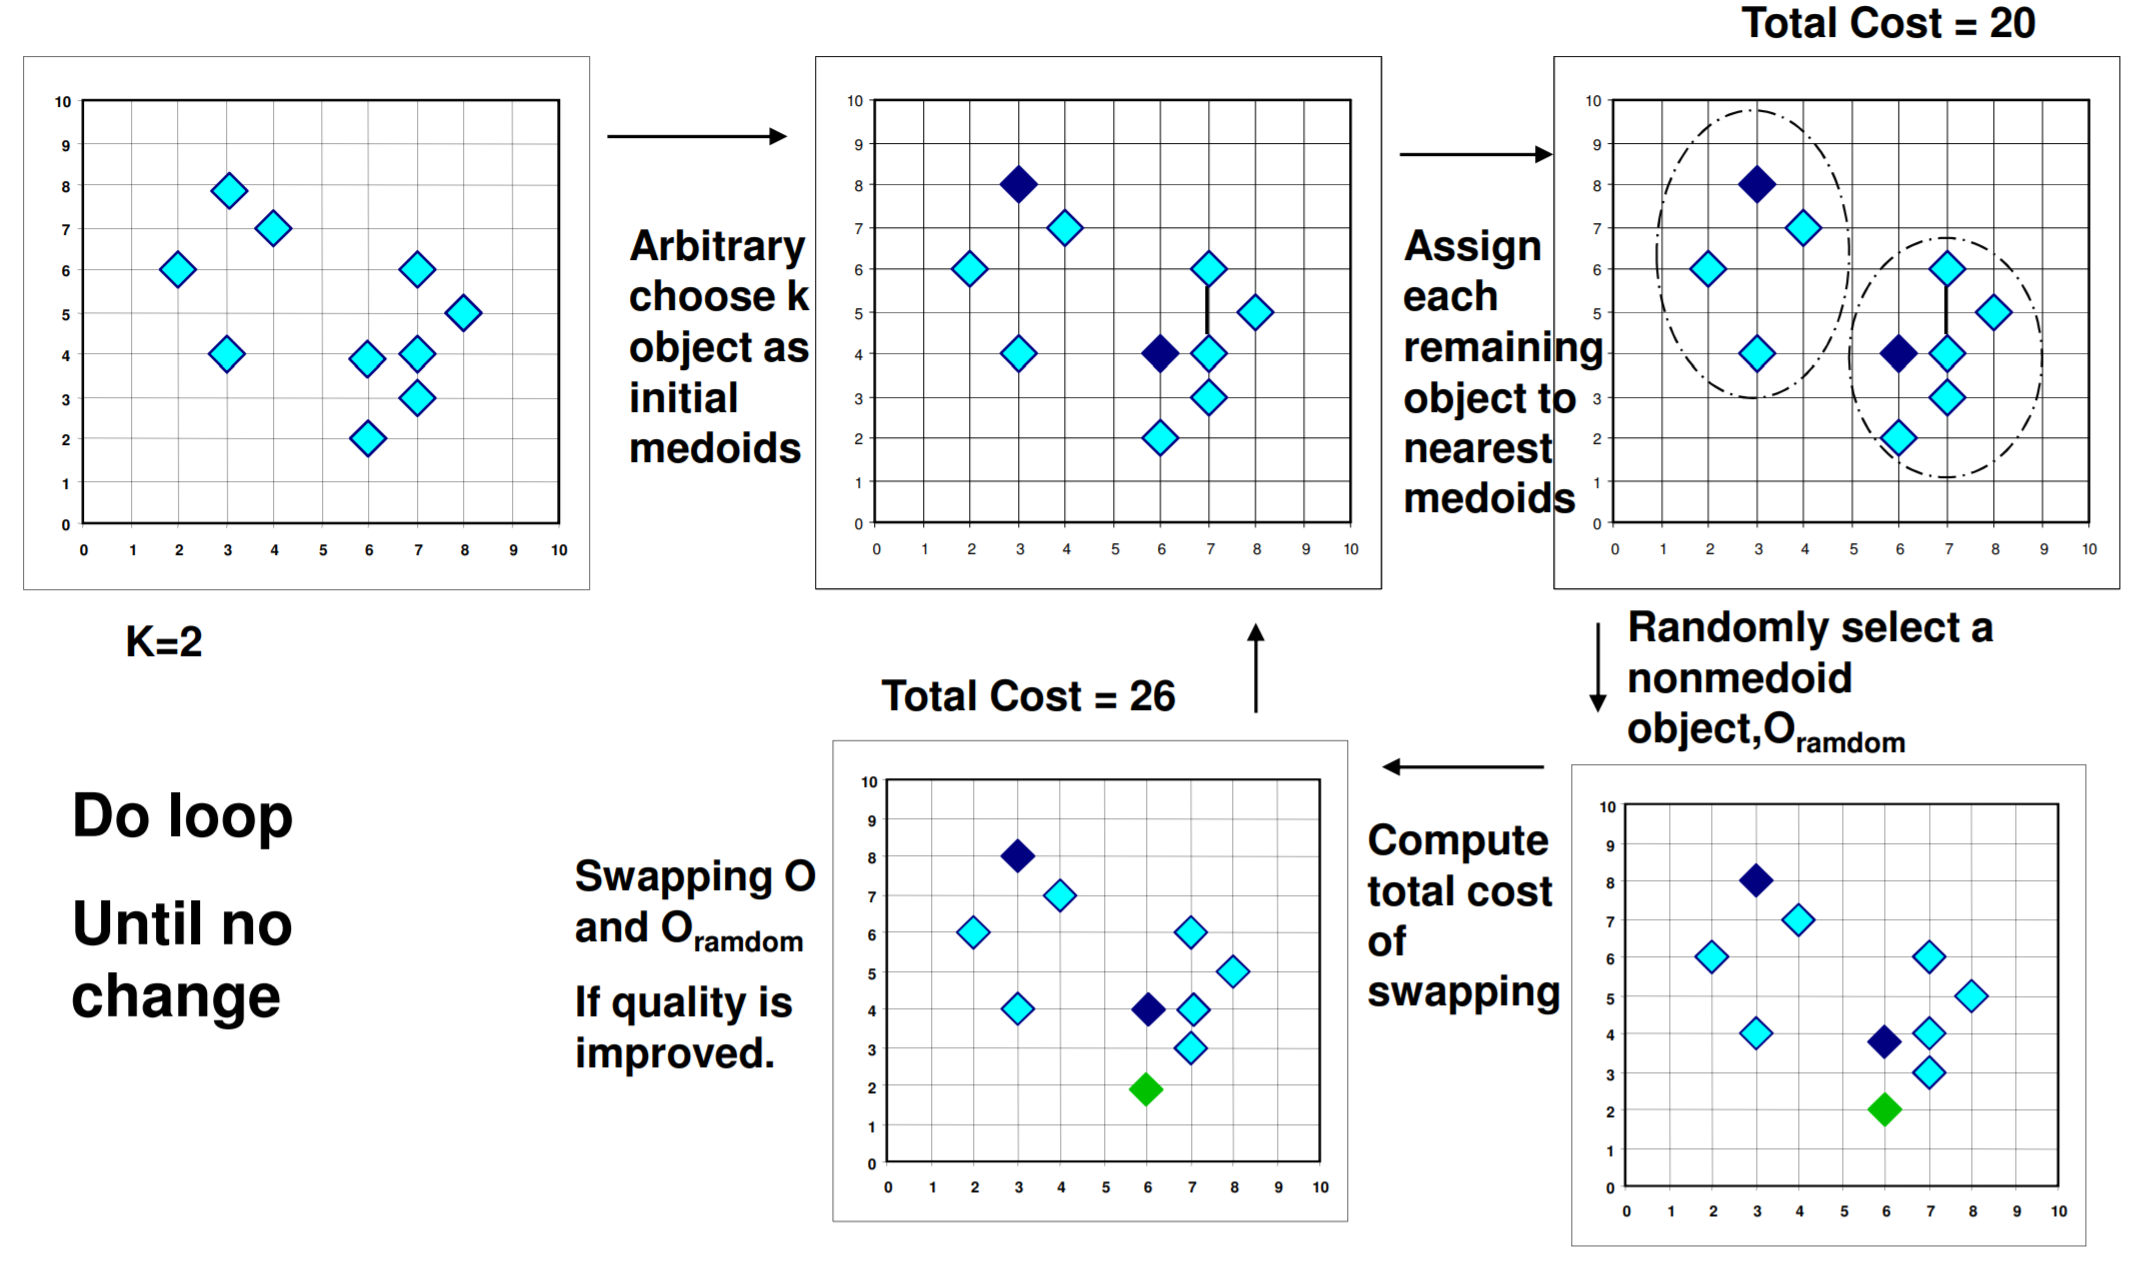

In [ ]:
Image('pw1012.PNG', width =900)

!pip install pyclustering

In [ ]:
!pip install pyclustering


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=116e93e8dd408e6a699fce40ac8111ff57d250dba7e4bdcef8a5723345e6be8a
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

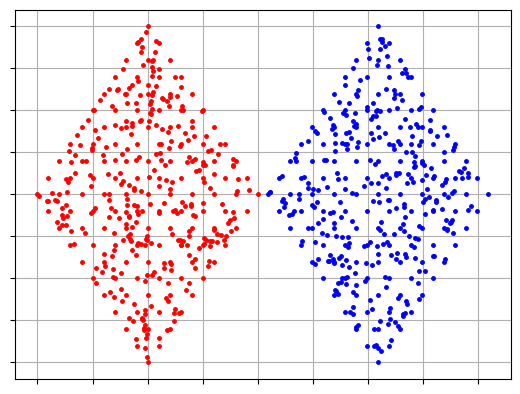

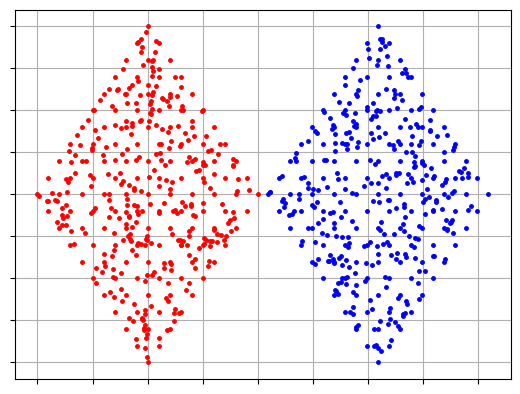

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis. 加载用于聚类分析的点列表。
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
# Set random initial medoids. 设置随机初始 medoids。
initial_medoids = [1, 500]
# Create instance of K-Medoids algorithm. 创建K-Medoids算法的实例。
kmedoids_instance = kmedoids(sample, initial_medoids)
# Run cluster analysis and obtain results. 运行聚类分析并获取结果。
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters. 显示已分配的集群。
print(clusters)
# Display clusters. 显示集群。
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [ ]:
sample

[[0.0, 0.0],
 [0.1, -0.1],
 [0.2, -0.2],
 [0.3, -0.3],
 [0.4, -0.4],
 [0.5, -0.5],
 [0.6, -0.6],
 [0.7, -0.7],
 [0.8, -0.8],
 [0.9, -0.9],
 [1.0, -1.0],
 [0.1, 0.1],
 [0.2, 0.0],
 [0.3, -0.1],
 [0.4, -0.2],
 [0.5, -0.3],
 [0.6, -0.4],
 [0.7, -0.5],
 [0.8, -0.6],
 [0.9, -0.7],
 [1.0, -0.8],
 [1.1, -0.9],
 [0.2, 0.2],
 [0.3, 0.1],
 [0.4, 0.0],
 [0.5, -0.1],
 [0.6, -0.2],
 [0.7, -0.3],
 [0.8, -0.4],
 [0.9, -0.5],
 [1.0, -0.6],
 [1.1, -0.7],
 [1.2, -0.8],
 [0.3, 0.3],
 [0.4, 0.2],
 [0.5, 0.1],
 [0.6, 0.0],
 [0.7, -0.1],
 [0.8, -0.2],
 [0.9, -0.3],
 [1.0, -0.4],
 [1.1, -0.5],
 [1.2, -0.6],
 [1.3, -0.7],
 [0.4, 0.4],
 [0.5, 0.3],
 [0.6, 0.2],
 [0.7, 0.1],
 [0.8, 0.0],
 [0.9, -0.1],
 [1.0, -0.2],
 [1.1, -0.3],
 [1.2, -0.4],
 [1.3, -0.5],
 [1.4, -0.6],
 [0.5, 0.5],
 [0.6, 0.4],
 [0.7, 0.3],
 [0.8, 0.2],
 [0.9, 0.1],
 [1.0, 0.0],
 [1.1, -0.1],
 [1.2, -0.2],
 [1.3, -0.3],
 [1.4, -0.4],
 [1.5, -0.5],
 [0.6, 0.6],
 [0.7, 0.5],
 [0.8, 0.4],
 [0.9, 0.3],
 [1.0, 0.2],
 [1.1, 0.1],
 [1.2, 0.0],
 [1.3,

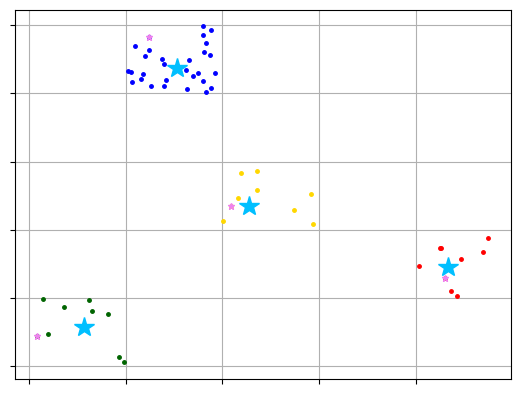

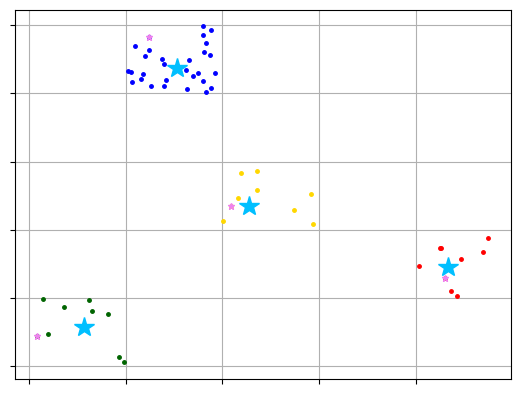

In [ ]:
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample

import numpy, warnings
numpy.warnings = warnings

# load list of points for cluster analysis 加载用于聚类分析的点列表
sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)

# initialize 初始化
initial_medoids = kmeans_plusplus_initializer(sample, 4, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize(return_index=True)

# create instance of K-Medoids algorithm 创建 K-Medoids 算法实例
kmedoids_instance = kmedoids(sample, initial_medoids)

# run cluster analysis and obtain results 运行聚类分析并获取结果
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# visualize clustering results 可视化聚类结果
visualizer = cluster_visualizer(1)
visualizer.append_clusters(clusters, sample, 0)
visualizer.append_cluster([sample[index] for index in initial_medoids], marker='*', markersize=5)
visualizer.append_cluster(medoids, data=sample, marker='*', markersize=15)
visualizer.show()

In [ ]:
sample

[[0.926445, 0.126412],
 [0.144706, 0.987019],
 [0.61783, 0.9626],
 [0.364875, 0.873276],
 [0.816825, 0.767734],
 [0.56845, 0.569056],
 [0.986346, 0.05509],
 [0.653092, 0.801198],
 [0.199204, 0.474921],
 [0.085177, 0.440827],
 [1.923789, 4.306381],
 [1.257845, 4.10197],
 [1.153872, 4.215423],
 [1.027098, 4.331249],
 [1.235441, 4.63963],
 [1.80508, 4.609467],
 [1.056782, 4.31567],
 [1.884653, 4.07751],
 [1.373499, 4.506044],
 [1.199638, 4.549227],
 [2.739741, 2.28594],
 [2.935752, 2.08966],
 [2.006202, 2.124409],
 [2.161529, 2.47041],
 [2.916867, 2.523174],
 [2.083596, 2.343243],
 [2.353953, 2.582947],
 [2.275744, 2.341464],
 [2.195224, 2.831759],
 [2.357756, 2.861451],
 [4.261191, 1.733438],
 [4.036062, 1.465132],
 [4.368142, 1.100842],
 [4.471069, 1.576629],
 [4.331865, 1.451407],
 [4.69886, 1.674527],
 [4.300143, 1.286052],
 [4.249831, 1.727785],
 [4.751436, 1.878438],
 [4.425734, 1.033563],
 [1.74495, 4.294445],
 [1.691943, 4.258711],
 [1.875249, 4.558748],
 [1.241175, 4.830152],
 [1

## K-Prototypes K-原型
Mixture of continuous and categorical data

连续数据和分类数据的混合

In [ ]:
#create dataset
import numpy as np
import pandas as pd

operating_systems = ["Android","iOS"]
isp_names = ["Cox","HughesNet","Xfinity","AT&T"]

data = []
for i in range(100):
    row = []
    row.append(np.random.choice(operating_systems)) #OS
    row.append(np.random.choice(isp_names)) #ISP
    row.append(np.random.poisson(lam=25)) #Age
    row.append(np.random.uniform(low=0.5, high=1000)) #Time Spent
    data.append(row)

customers = pd.DataFrame(data, columns = ['OS', 'ISP','Age','Time Spent'])

In [ ]:
customers.head()

,OS,ISP,Age,Time Spent
0,Android,Xfinity,20,458.618838
1,iOS,HughesNet,24,940.585536
2,Android,Cox,22,765.219213
3,iOS,Cox,31,876.679863
4,Android,HughesNet,24,857.980246


In [ ]:
# make sure to rescale those continuous variables
# 确保重新调整这些连续变量
from sklearn import preprocessing
customers_norm = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['Age','Time Spent']] = scaler.fit_transform(customers_norm[['Age','Time Spent']])
customers_norm.head()

,OS,ISP,Age,Time Spent
0,Android,Xfinity,0.25,0.462783
1,iOS,HughesNet,0.45,0.950055
2,Android,Cox,0.35,0.772758
3,iOS,Cox,0.80,0.885446
4,Android,HughesNet,0.45,0.866540


!pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao')

# specify which columns in the data are categorical (columns 0 and 1)
# 指定数据中的哪些列是分类的（第 0 列和第 1 列）
clusters = kproto.fit_predict(customers_norm, categorical=[0, 1])
#join data with labels 连接带有标签的数据
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [ ]:
labeledCustomers

,OS,ISP,Age,Time Spent,labels
0,Android,Xfinity,20,458.618838,1
1,iOS,HughesNet,24,940.585536,1
2,Android,Cox,22,765.219213,0
3,iOS,Cox,31,876.679863,1
4,Android,HughesNet,24,857.980246,0
...,...,...,...,...,...
95,iOS,AT&T,19,128.739667,2
96,Android,Cox,27,688.738179,0
97,Android,HughesNet,29,255.241168,2
98,Android,AT&T,22,944.771327,0


In [ ]:
labeledCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OS          100 non-null    object 
 1   ISP         100 non-null    object 
 2   Age         100 non-null    int64  
 3   Time Spent  100 non-null    float64
 4   labels      100 non-null    uint16 
dtypes: float64(1), int64(1), object(2), uint16(1)
memory usage: 3.4+ KB


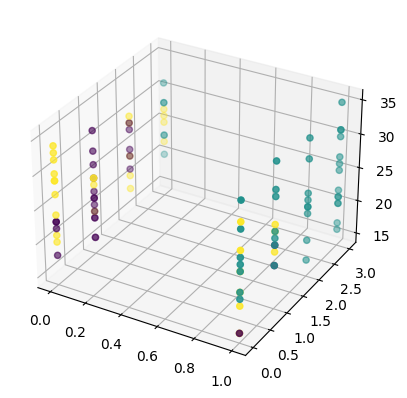

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.scatter(labeledCustomers.OS.astype('category').cat.codes, labeledCustomers.ISP.astype('category').cat.codes,
           labeledCustomers.Age, c = labeledCustomers.labels)

plt.show()

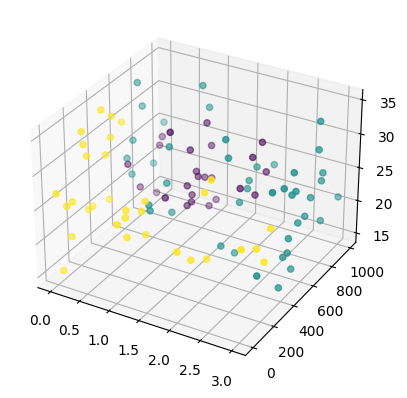

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(labeledCustomers.ISP.astype('category').cat.codes, labeledCustomers['Time Spent'],
           labeledCustomers.Age, c = labeledCustomers.labels)

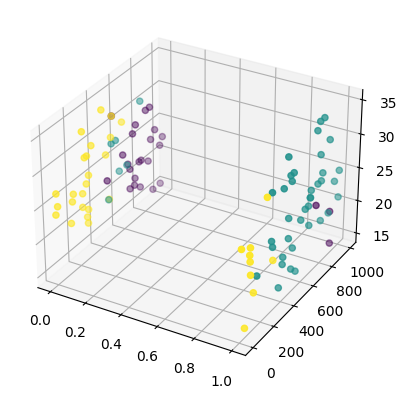

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(labeledCustomers.OS.astype('category').cat.codes, labeledCustomers['Time Spent'],
           labeledCustomers.Age, c = labeledCustomers.labels)

# Common distance measures used for clustering 用于聚类的常见距离测量
![image.png](attachment:image.png)